In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Set seaborn style
sns.set(style="whitegrid")

# Connect to SQLite DB
conn = sqlite3.connect('../db/food_waste.db')


# 1. Food Type Distribution

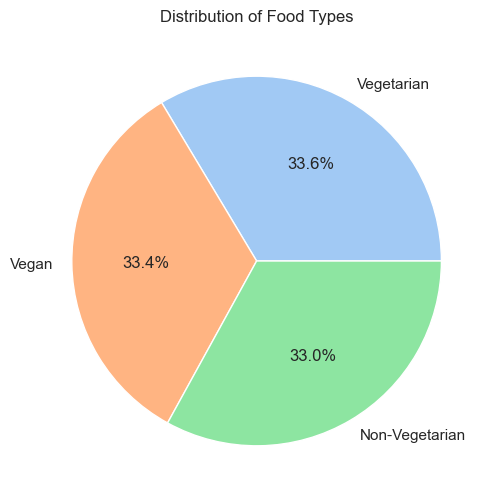

In [6]:
df_food = pd.read_sql("SELECT Food_Type FROM food_listings", conn)

plt.figure(figsize=(6, 6))
df_food['Food_Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Distribution of Food Types")
plt.ylabel("")
plt.show()


# 🍴 2. Meal Type Frequency

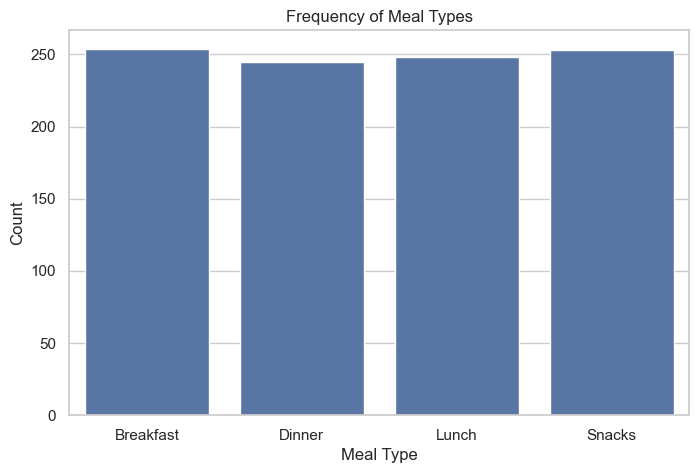

In [13]:
df_meal = pd.read_sql("SELECT Meal_Type FROM food_listings", conn)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_meal, x='Meal_Type')
plt.title("Frequency of Meal Types")
plt.xlabel("Meal Type")
plt.ylabel("Count")
plt.show()

# 🏪 3. Top 10 Donating Providers

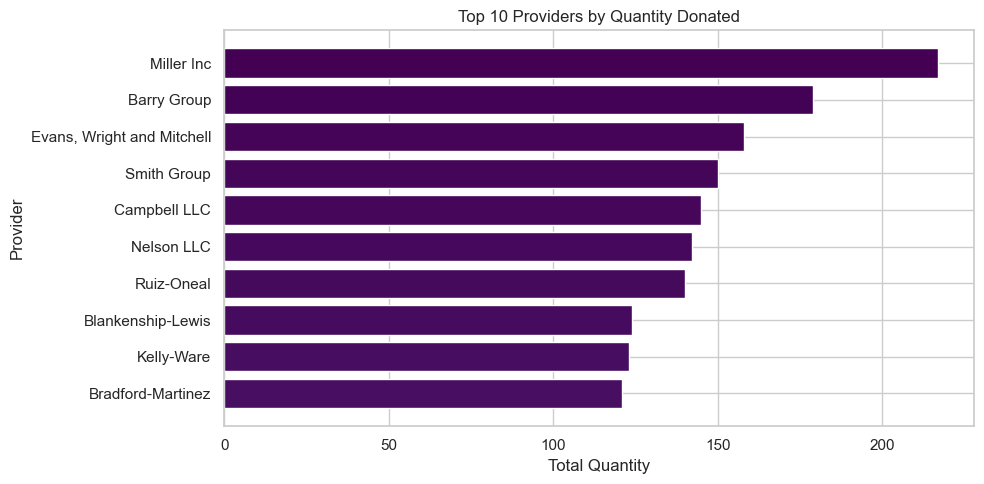

In [20]:
query = '''
SELECT p.Name, SUM(f.Quantity) AS Total_Quantity
FROM food_listings f
JOIN providers p ON f.Provider_ID = p.Provider_ID
GROUP BY p.Name
ORDER BY Total_Quantity DESC
LIMIT 10
'''
top_providers = pd.read_sql(query, conn)
plt.figure(figsize=(10, 5))
plt.barh(top_providers['Name'], top_providers['Total_Quantity'], color=plt.cm.viridis(range(len(top_providers))))
plt.title("Top 10 Providers by Quantity Donated")
plt.xlabel("Total Quantity")
plt.ylabel("Provider")
plt.gca().invert_yaxis()  # To match seaborn's default order
plt.tight_layout()
plt.show()

# 👥 4. Most Active Receivers

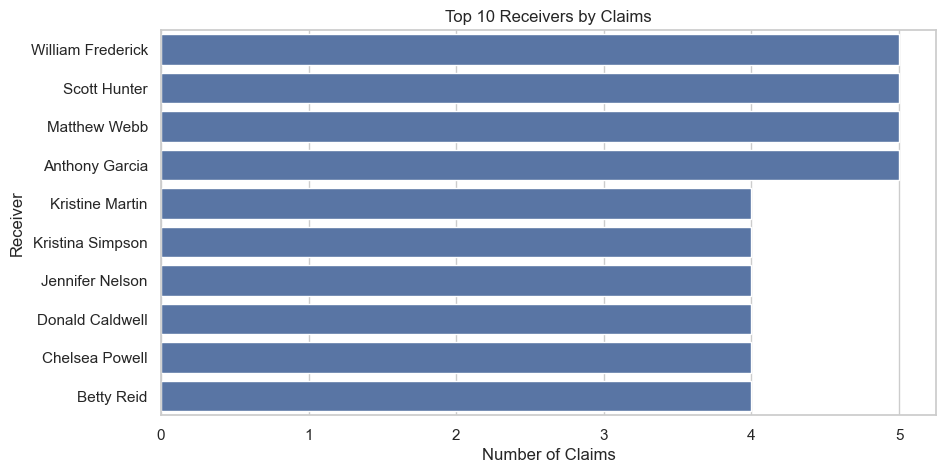

In [23]:
query = '''
SELECT r.Name, COUNT(*) AS Claims
FROM claims c
JOIN receivers r ON c.Receiver_ID = r.Receiver_ID
GROUP BY r.Name
ORDER BY Claims DESC
LIMIT 10
'''
top_receivers = pd.read_sql(query, conn)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_receivers, x='Claims', y='Name')
plt.title("Top 10 Receivers by Claims")
plt.xlabel("Number of Claims")
plt.ylabel("Receiver")
plt.show()


# 🧾 5. Claim Status Breakdown

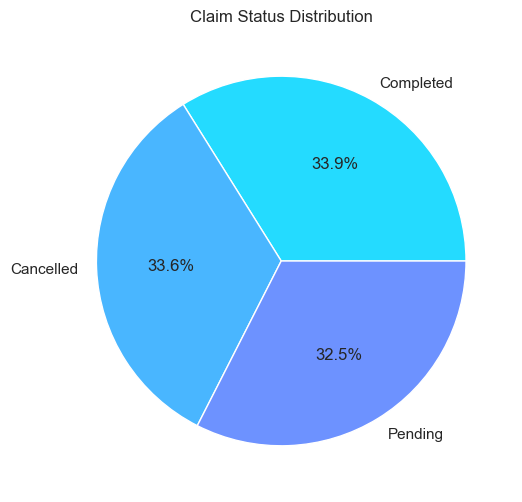

In [26]:
df_status = pd.read_sql("SELECT Status FROM claims", conn)

plt.figure(figsize=(6, 6))
df_status['Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("cool"))
plt.title("Claim Status Distribution")
plt.ylabel("")
plt.show()


# 🕒 6. Claims Over Time

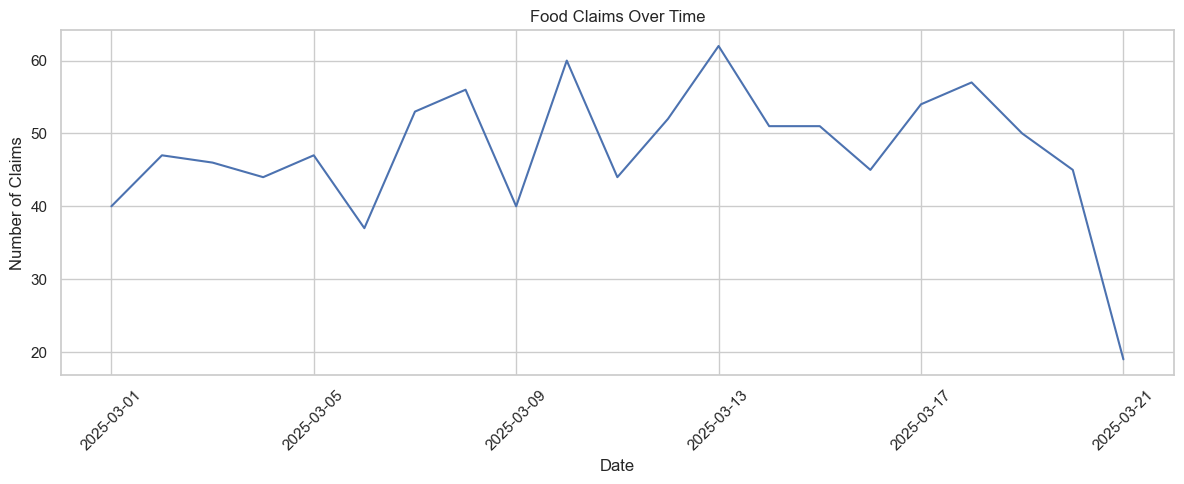

In [29]:
df_time = pd.read_sql("SELECT Timestamp FROM claims", conn)
df_time['Timestamp'] = pd.to_datetime(df_time['Timestamp'])

df_time['Date'] = df_time['Timestamp'].dt.date
trend = df_time.groupby('Date').size()

plt.figure(figsize=(12, 5))
trend.plot()
plt.title("Food Claims Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
